# Pyteomics ms data reader

The tool is adapted from [Link to the Github](https://github.com/pymzml/pymzML)

The whole workflow should cite 

```
M Kösters, J Leufken, S Schulze, K Sugimoto, J Klein, R P Zahedi, M Hippler, S A Leidel, C Fufezan; pymzML v2.0: introducing a highly compressed and seekable gzip format, Bioinformatics, doi: https://doi.org/10.1093/bioinformatics/bty046
```

The Introduction is [Here](https://pyteomics.readthedocs.io/en/latest/data.html#mzml-and-mzxml)

In [147]:
import pyteomics
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.graph_objects as go


In [2]:
#Read mzml files
f=mzml.MzML('20191210_MSpos_tl_frac_B7_F5_narrow_2_noSPE.mzML')

In [3]:
#The data structure is a mzml list contains scans as dictionary and titles
#Could iterate for the MS1/MS2 spectrums
#f[i] #where i is the index

#Get the scan time--Data structure is complex
f[0]['scanList']['scan'][0]['scan start time']

0.044816666667 minute

In [4]:
#By this way iteration works
#for i in range(len(f)):
#    if f[i]['ms level'] == 1:
#        print (f[i]['id'],f[i]['scanList']['scan'][0]['scan start time'])

In [ ]:
def noise_removal(spectrum, baseline):
    '''
    Remove noises, then remove void features from the whole list
    '''

In [164]:
#TIC plot
def tic_plot(spectrum):
    '''
    Static tic plot function
    '''
    time=[]
    TIC=[]
    for i in range(len(spectrum)):
        time.append(spectrum[i]['scanList']['scan'][0]['scan start time'])
        TIC.append(spectrum[i]['total ion current'])
        
    plt.figure(figsize=(10,6))
    plt.plot(time,TIC)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('RT (min)')
    plt.ylabel('TIC')
    plt.title('TIC spectrum')
    plt.show()
    
    return

In [239]:
def tic_live(spectrum, width=1000, height=600):
    '''
    Interactive tic plot function
    '''
    time=[]
    TIC=[]
    for i in range(len(spectrum)):
        time.append(spectrum[i]['scanList']['scan'][0]['scan start time'])
        TIC.append(spectrum[i]['total ion current'])
        
    fig = go.Figure([go.Scatter(x=t, y=tic,
                hovertemplate = 'Int: %{y}' + '<br>RT: %{x}minute<br>')])

    fig.update_layout(
        template = 'simple_white',
        width=width,
        height=height,
        xaxis={'title':'Retention Time (min)'},
        yaxis = dict(
            showexponent = 'all',
            exponentformat = 'e',
            title = 'Intensity'))

    fig.show()
    
    return 

In [238]:
tic_live(f)

In [174]:
peaklist=list(zip(f[0]['m/z array'],f[0]['intensity array']))

In [219]:
def ms1_live(spectrum, time, width = 1000, height = 700):
    '''
    Interactive spectrum plot with nearest retention time from the given time
    '''
    for i in range(len(spectrum)):
        if spectrum[i]['scanList']['scan'][0]['scan start time'] >= time:
            mz = f[i]['m/z array']
            ints = f[i]['intensity array']
            rt = spectrum[i]['scanList']['scan'][0]['scan start time']
            break
            
    fig = go.Figure([go.Bar(x=mz, y=ints, marker_color = 'red', width = 0.5,
                    hovertemplate =
                    'Int: %{y}'+
                    '<br>m/z: %{x}<br>')])
    fig.update_layout(
            title_text=str(round(rt, 3)) + ' min MS1 spectrum, input '+ str(time) + ' min',
            template = 'simple_white',
            width=width,
            height=height,
            xaxis={'title':'m/z ratio'},
            yaxis = dict(
                showexponent = 'all',
                exponentformat = 'e',
                title = 'Intensity'))
    fig.show()

In [220]:
ms1_live(f,15)

Text(0.5, 1.0, 'MS1 spectrum')

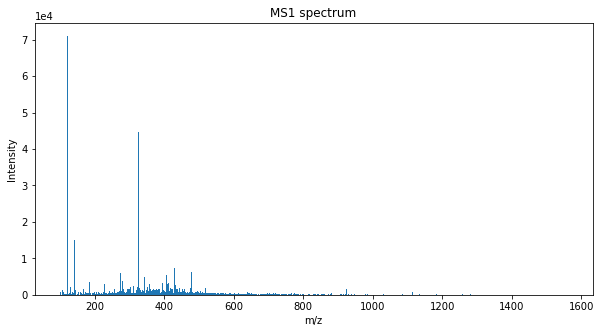

In [181]:
plt.figure(figsize=(10,5))
plt.bar(f[3000]['m/z array'], f[3000]['intensity array'],width = 1.0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.title('MS1 spectrum')

In [9]:
def rt_profiler(ms1_file):
    '''
    Generate a dictionary from given mzml file, key: rt, value: peak lists
    '''
    rt_dict = {}
    for index in range(len(ms1_file)):
        peaklist=list(zip(ms1_file[index]['m/z array'], ms1_file[index]['intensity array']))
        rt_dict.update({ms1_file[index]['scanList']['scan'][0]['scan start time'] : peaklist})
    
    return rt_dict

In [43]:
def mz_locator(input_list, mz, error):
    '''
    Find specific mzs from given mz and error range
    input list: mz list
    '''
    target_mz = []
    target_index = []
    
    lower_mz = mz - error
    higher_mz = mz + error

    for i, mzs in enumerate(input_list):
        if mzs < lower_mz:
            continue
        elif mzs >= lower_mz:
            if mzs <= higher_mz:
                target_mz.append(mzs)
                target_index.append(i)
        elif mzs > higher_mz:
                target_mz = 0
                target_index = 'NA'
                break
        
    return target_mz, target_index

In [44]:
'''
def mz_locator(input_list, mz, error):
    for i, mzs in enumerate(input_list):
        if math.isclose(mz, mzs, abs_tol = error):
            target_mz = mzs
            target_index = i
            break
        else:
            target_mz = 0
            target_index = 'NA'
    return target_mz, target_index
'''

"\ndef mz_locator(input_list, mz, error):\n    for i, mzs in enumerate(input_list):\n        if math.isclose(mz, mzs, abs_tol = error):\n            target_mz = mzs\n            target_index = i\n            break\n        else:\n            target_mz = 0\n            target_index = 'NA'\n    return target_mz, target_index\n"

In [38]:
f[3000]['m/z array'][(f[3000]['m/z array']>299) & (f[3000]['m/z array']<300)]

array([299.17570695, 299.28875378, 299.36655601])

In [53]:
rt, index = mz_locator(f[3000]['m/z array'], 299.5, 0.5)

In [61]:
def ms_chromatogram_list(ms_file, input_mz, error):
    '''
    Generate a peak list for specific input_mz over whole rt period from the mzml file
    '''
    retention_time = []
    intensity = []
    for i in range(len(ms_file)):
        #print(i)
        retention_time.append(ms_file[i]['scanList']['scan'][0]['scan start time'])
        
        target_mz, target_index = mz_locator(ms_file[i]['m/z array'], input_mz, error)
        if target_index == 'NA':
            intensity.append(0)
        else:
            intensity.append(sum(ms_file[i]['intensity array'][target_index]))
            
    return retention_time, intensity

In [225]:
def ms_chromatogram_plot(ms_file, input_mz, error,smooth=False):
    '''
    Chromatogram for selected mz over time
    '''
    retention_time = []
    intensity = []
    for i in range(len(ms_file)):
        #print(i)
        retention_time.append(ms_file[i]['scanList']['scan'][0]['scan start time'])
        
        target_mz, target_index = mz_locator(ms_file[i]['m/z array'], input_mz, error)
        if target_index == 'NA':
            intensity.append(0)
        else:
            intensity.append(sum(ms_file[i]['intensity array'][target_index]))

    def peak_smooth(input_list, baseline=500):
        for i, int_ in enumerate(input_list):
            if i > 1 and i < len(input_list)-3:
                if int_ > baseline:
                    for index in np.arange(i+1,i+3):
                        if input_list[index] == 0:
                            input_list[index] = (input_list[index-1]+input_list[index+1])/2
                        else:
                            continue
            
    if smooth == True:
        peak_smooth(intensity)


    plt.figure(figsize=(20,10))
    plt.plot(retention_time, intensity)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('m/z')
    plt.ylabel('Intensity')
    plt.title('MS1 spectrum')
    plt.xlim(0,retention_time[-1])
    plt.ylim(0,)
    plt.show()
    
    return

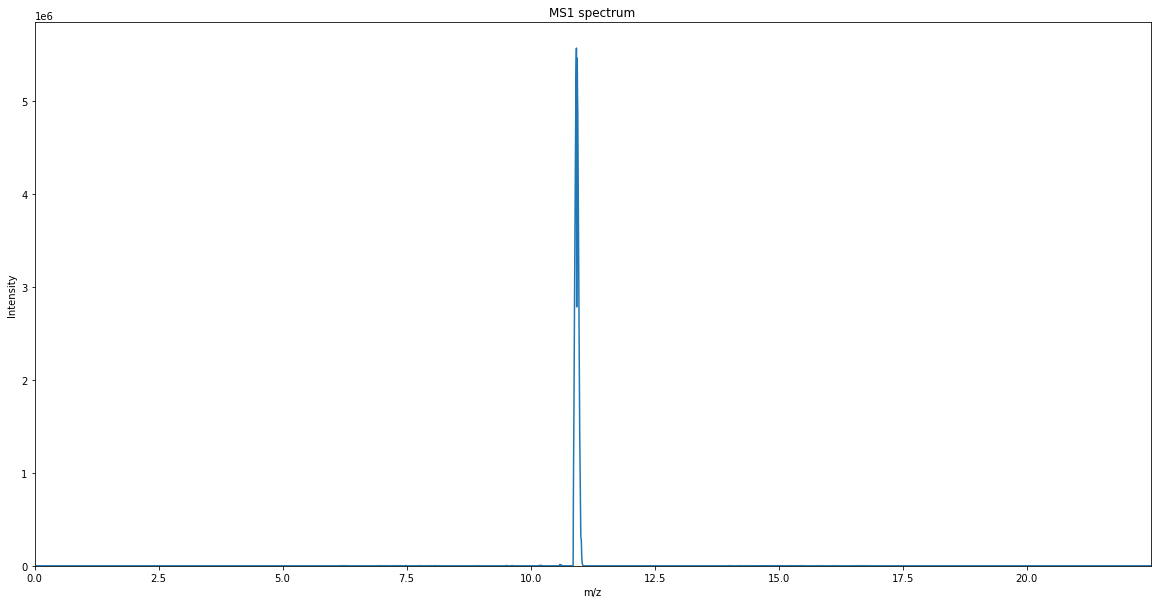

In [234]:
ms_chromatogram_plot(f, 299.17570695, 0.001,smooth=True)

In [230]:
def ms_chromatogram_live(ms_file, input_mz, error,smooth=False,width = 1000, height = 600):
    '''
    Interactive chromatogram for selected m/z
    '''
    retention_time = []
    intensity = []
    for i in range(len(ms_file)):
        #print(i)
        retention_time.append(ms_file[i]['scanList']['scan'][0]['scan start time'])
        
        target_mz, target_index = mz_locator(ms_file[i]['m/z array'], input_mz, error)
        if target_index == 'NA':
            intensity.append(0)
        else:
            intensity.append(sum(ms_file[i]['intensity array'][target_index]))

    def peak_smooth(input_list, baseline=500):
        for i, int_ in enumerate(input_list):
            if i > 1 and i < len(input_list)-3:
                if int_ > baseline:
                    for index in np.arange(i+1,i+3):
                        if input_list[index] == 0:
                            input_list[index] = (input_list[index-1]+input_list[index+1])/2
                        else:
                            continue
            
    if smooth == True:
        peak_smooth(intensity)


    fig = go.Figure([go.Scatter(x=retention_time, y=intensity,
                hovertemplate = 'Int: %{y}' + '<br>RT: %{x}minute<br>')])

    fig.update_layout(
        title_text=str(round(input_mz, 2)) + ' chromatogram, error '+ str(error),
        template = 'simple_white',
        width=width,
        height=height,
        xaxis={'title':'Retention Time (min)'},
        yaxis = dict(
            showexponent = 'all',
            exponentformat = 'e',
            title = 'Intensity'))

    fig.show()
    
    return

In [231]:
ms_chromatogram_live(f, 299.17570695, 0.001,smooth=True)

In [17]:
test_mz = []
for i in range(len(f)):
    test_mz.append(f[i]['m/z array'])

In [18]:
from pandas.core.common import flatten
test_mz1 = list(flatten(test_mz))

In [19]:
len(test_mz1)

5852935

In [20]:
test_mz2 = list(set([test_mz1[i] for i in range(len(test_mz1))]))

In [21]:
len(test_mz2)

5850369